In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split

# Función para reescalar una imagen a tamaño específico
def resize_image(img, target_size=(62, 62)):
    return cv2.resize(img, target_size)

# Lista de rutas a las carpetas de imágenes
rutas_carpetas = ['PlantVillage\Temprano', 'PlantVillage\Tarde','PlantVillage\Sano']
# Crear el arreglo para almacenar las imágenes y las etiquetas
imagenes_etiquetadas = []

# Extensiones de imágenes permitidas
extensiones_imagenes = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']

# Recorrer cada carpeta y procesar las imágenes
for ruta_carpeta in rutas_carpetas:
    
    for idx, ruta_carpeta in enumerate(rutas_carpetas):
        # Definir la etiqueta numérica según el índice
        if 'Sano' in ruta_carpeta:
            etiqueta = 0
        elif 'Temprano' in ruta_carpeta:
            etiqueta = 1
        elif 'Tarde' in ruta_carpeta:
            etiqueta = 2

        # Obtener la lista de archivos en la carpeta
        nombres_archivos = os.listdir(ruta_carpeta)

        # Filtrar solo las imágenes
        nombres_imagenes = [f for f in nombres_archivos if os.path.splitext(f)[1].lower() in extensiones_imagenes]

        # Abrir las imágenes con OpenCV, reescalar a 64x64 y convertirlas a escala de grises
        for nombre in nombres_imagenes:
            ruta_imagen = os.path.join(ruta_carpeta, nombre)
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)  # Abre la imagen y convierte a escala de grises
            if imagen is not None:
                imagen_resized = resize_image(imagen, target_size=(48, 48))  # Reescalar a 64x64 píxeles
                imagenes_etiquetadas.append((imagen_resized, etiqueta))

# Separar las imágenes y etiquetas en listas separadas
images = [item[0] for item in imagenes_etiquetadas]
labels = [item[1] for item in imagenes_etiquetadas]

# Convertir a numpy arrays
images = np.array(images)
labels = np.array(labels)

# Dividir los datos en conjuntos de entrenamiento y pruebas
Imagenes_train, Imagens_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y pruebas
print("Forma de X_train:", Imagenes_train.shape)
print("Forma de X_test:", Imagens_test.shape)
print("Forma de y_train:", labels_train.shape)
print("Forma de y_test:", labels_test.shape)


Forma de X_train: (5164, 48, 48)
Forma de X_test: (1292, 48, 48)
Forma de y_train: (5164,)
Forma de y_test: (1292,)


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
])

In [10]:
# Agregar capas completamente conectadas para clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [11]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 4, 4, 64)         

In [13]:
model.fit(Imagenes_train, labels_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


65/65 [==============================] - 4s 37ms/step - loss: 0.8853 - accuracy: 0.5744 - val_loss: 0.6792 - val_accuracy: 0.7231
Epoch 2/50
65/65 [==============================] - 2s 32ms/step - loss: 0.6228 - accuracy: 0.7570 - val_loss: 0.6226 - val_accuracy: 0.7744
Epoch 3/50
65/65 [==============================] - 2s 33ms/step - loss: 0.4457 - accuracy: 0.8417 - val_loss: 0.4346 - val_accuracy: 0.8325
Epoch 4/50
65/65 [==============================] - 2s 33ms/step - loss: 0.3662 - accuracy: 0.8688 - val_loss: 0.3551 - val_accuracy: 0.8809
Epoch 5/50
65/65 [==============================] - 2s 35ms/step - loss: 0.2841 - accuracy: 0.9003 - val_loss: 0.2800 - val_accuracy: 0.8877
Epoch 6/50
65/65 [==============================] - 2s 33ms/step - loss: 0.2134 - accuracy: 0.9223 - val_loss: 0.2240 - val_accuracy: 0.9148
Epoch 7/50
65/65 [==============================] - 2s 32ms/step - loss: 0.1693 - accuracy: 0.9359 - val_loss: 0.1935 - val_accuracy: 0.9303
Epoch 8/50


In [14]:
test_loss, test_acc = model.evaluate(Imagens_test, labels_test)
print('Test accuracy:', test_acc)

41/41 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 0.9915
Test accuracy: 0.9914860725402832


In [15]:
predictions = model.predict(Imagens_test)

41/41 [==============================] - 0s 7ms/step


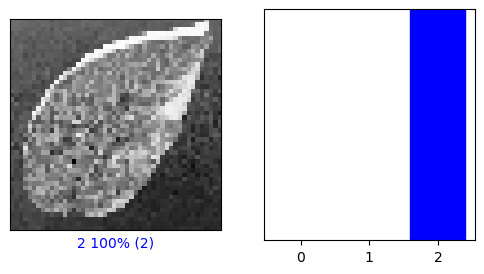

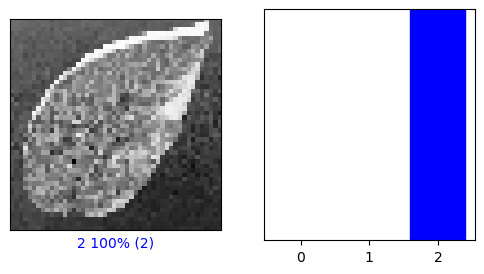

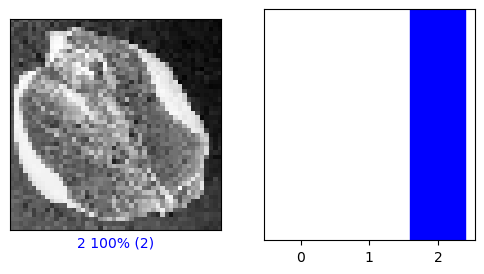

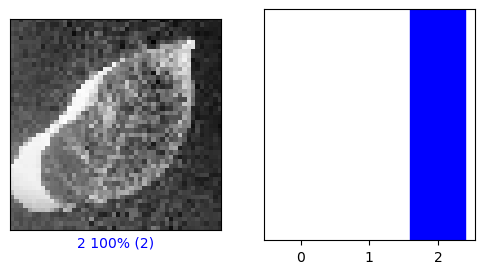

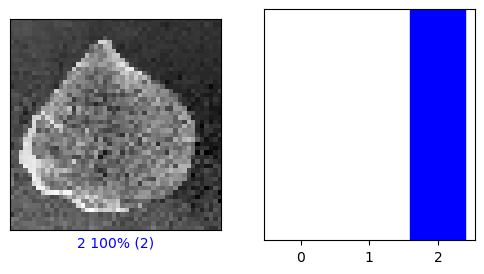

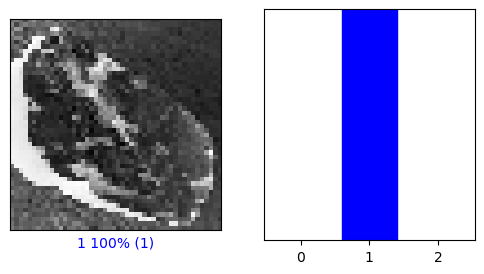

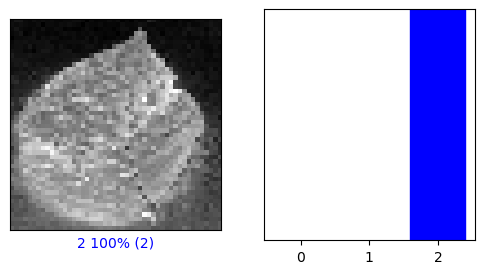

In [17]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_test[i], Imagens_test[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], labels_test[i])
plt.show()

for i in range (6):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], labels_test[i], Imagens_test[i])
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], labels_test[i])
plt.show()

In [16]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(3))  # Ajusta el rango según el número de clases (0, 1, 2)
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

In [18]:
model.save('Hojas_Model2.h5');

C:\Users\josue\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model('Hojas_Model2.h5')

# Configurar la captura de video desde la cámara
cap = cv2.VideoCapture(0)  # El argumento '0' indica la primera cámara conectada

# Verificar si la cámara se abrió correctamente
if not cap.isOpened():
    print("Error al abrir la cámara")
    exit()

while True:
    # Capturar fotograma por fotograma
    ret, frame = cap.read()

    # Preprocesar la imagen para que coincida con las entradas del modelo
    processed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises si es necesario
    processed_frame = cv2.resize(processed_frame, (48, 48))  # Redimensionar a 64x64 píxeles
    processed_frame = np.expand_dims(processed_frame, axis=0)  # Añadir dimensión de lote (batch dimension)
    processed_frame = np.expand_dims(processed_frame, axis=-1)  # Añadir canal (escala de grises)

    # Realizar la predicción con el modelo
    predictions = model.predict(processed_frame)
    predicted_class = np.argmax(predictions)

    # Definir colores para el marco según la predicción
    if predicted_class == 0:
        color = (0, 255, 0)  # Verde para hoja sana
    elif predicted_class == 1:
        color = (0, 255, 255)  # Amarillo para hoja temprana
    elif predicted_class == 2:
        color = (0, 0, 255)  # Rojo para hoja tarde

    # Dibujar el marco alrededor de la región de interés (ROI)
    frame_height, frame_width = frame.shape[:2]
    cv2.rectangle(frame, (0, 0), (frame_width, frame_height), color, thickness=2)

    # Mostrar el resultado en una ventana
    cv2.putText(frame, f'Predicted Class: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow('Real-Time Prediction', frame)

    # Salir del bucle si se presiona 'q' en el teclado
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura de video y cerrar todas las ventanas abiertas
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step
